In [1]:
import os
import re
import glob
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('pdf', fonttype=42)

In [2]:
dmr_df = pd.read_csv("Methylpy_B-Mem_rms_results_collapsed.tsv", sep="\t")

In [3]:
dmr_df

,#chr,start,end,number_of_dms,hypermethylated_samples,hypomethylated_samples,methylation_level_acu,methylation_level_C,methylation_level_cro,methylation_level_Ctrl,methylation_level_D28,methylation_level_frequent,methylation_level_High,methylation_level_Low,methylation_level_Med,methylation_level_MRSA,methylation_level_MSSA,methylation_level_unfrequent,methylation_level_W
0,chr1,129332,129332,1,NaN,NaN,NaN,NaN,NaN,0.769231,NaN,0.866667,NaN,NaN,NaN,0.181818,0.538462,0.800000,NaN
1,chr1,183802,183802,1,NaN,MRSA,NaN,NaN,NaN,0.981818,NaN,1.000000,NaN,NaN,NaN,0.754386,0.950617,0.937500,NaN
2,chr1,190911,190911,1,NaN,"High,Med",1.000000,0.950000,0.911765,0.988372,0.952381,1.000000,0.786885,1.000000,0.666667,NaN,NaN,1.000000,0.945946
3,chr1,629115,629154,5,"MSSA,Ctrl","C,unfrequent",0.815789,0.383838,0.961538,0.885714,0.933333,0.933333,0.974359,0.800000,1.000000,0.976744,0.974026,0.478992,0.815789
4,chr1,629834,630017,2,"Ctrl,High",W,0.168421,0.176568,0.160584,0.220365,0.137161,0.171286,0.192755,0.270742,0.186220,0.181491,0.182614,0.164373,0.144698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181682,chrY,56855499,56855499,1,"cro,D28,High","MSSA,unfrequent",0.812500,0.880000,0.894737,0.723164,0.966667,0.662791,0.903226,1.000000,0.888889,0.595506,0.549550,0.547619,0.757576
181683,chrY,56870983,56870983,1,High,"MRSA,MSSA",0.609756,0.562500,0.589474,0.481720,0.573333,0.577114,0.628378,0.705882,0.648649,0.411483,0.362934,0.463415,0.519608
181684,chrY,56874973,56874973,1,"cro,W",NaN,0.000000,1.000000,0.583333,0.333333,1.000000,0.043478,0.416667,0.000000,0.000000,0.040000,0.043478,0.187500,0.625000
181685,chrY,56884830,56884830,1,NaN,"MRSA,MSSA",0.812500,1.000000,0.937500,0.815385,0.941176,0.689655,0.888889,0.750000,1.000000,0.562500,0.512821,0.730769,0.888889


In [4]:
convert_name = {'cro': 'HIV_chronic',
               'Low': 'OP_Low',
               'Med': 'OP_Med',
               'High': 'OP_High',
               'acu': 'HIV_acute',
               'frequent': 'BA_frequent',
               'D28': 'Influenza',
               'unfrequent': 'BA_infrequent',
               'C': 'COVID_nS',
               'W': 'COVID_S',
               'Ctrl': 'Ctrl',
               'MRSA': 'MRSA',
               'MSSA': 'MSSA'}

In [5]:
hypo_dmrs = defaultdict(dict)
hyper_dmrs = defaultdict(dict)
for i, row in dmr_df.iterrows():
    if str(row['hypermethylated_samples']) != 'nan':
        samples = row['hypermethylated_samples'].split(",")
        for sample in samples:
            name = convert_name[sample]
            hyper_dmrs[i][name] = 1
    if str(row['hypomethylated_samples']) != 'nan':
        samples = row['hypomethylated_samples'].split(",")
        for sample in samples:
            name = convert_name[sample]
            hypo_dmrs[i][name] = 1

In [6]:
hypo_dmrs_df = pd.DataFrame.from_dict(hypo_dmrs, orient='index')
hyper_dmrs_df = pd.DataFrame.from_dict(hyper_dmrs, orient='index')

In [7]:
hypo_dmrs_df.shape

(154490, 13)

In [8]:
hyper_dmrs_df.shape

(95612, 13)

In [9]:
expo_order = ['OP_Low', 'OP_Med', 'OP_High', 'HIV_acute','HIV_chronic','Influenza','COVID_nS', 'COVID_S','MRSA','MSSA',
             'BA_infrequent','BA_frequent','Ctrl']

In [10]:
hypo_input = hypo_dmrs_df[expo_order].fillna(0).value_counts()

In [11]:
from upsetplot import plot, UpSet

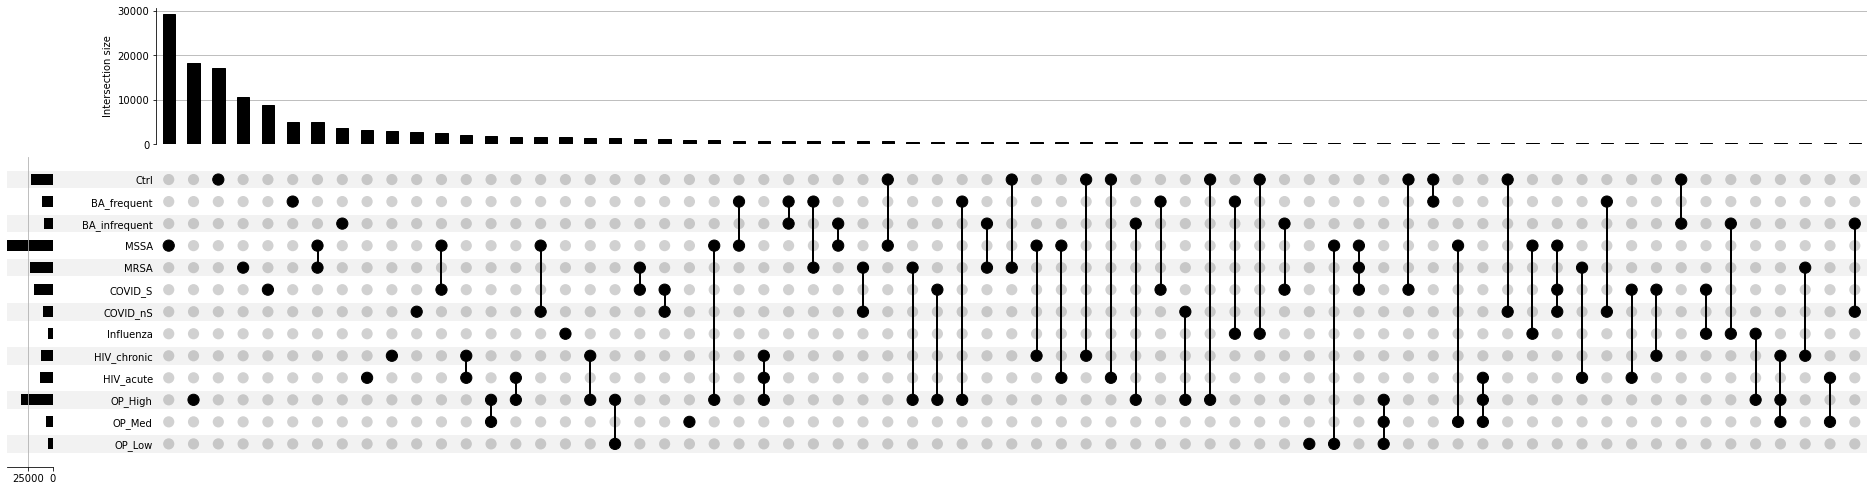

In [12]:
UpSet(hypo_input,min_subset_size=200, sort_by='cardinality', sort_categories_by='input').plot()
plt.savefig("hypo.upset.pdf")

In [13]:
hyper_input = hyper_dmrs_df[expo_order].fillna(0).value_counts()

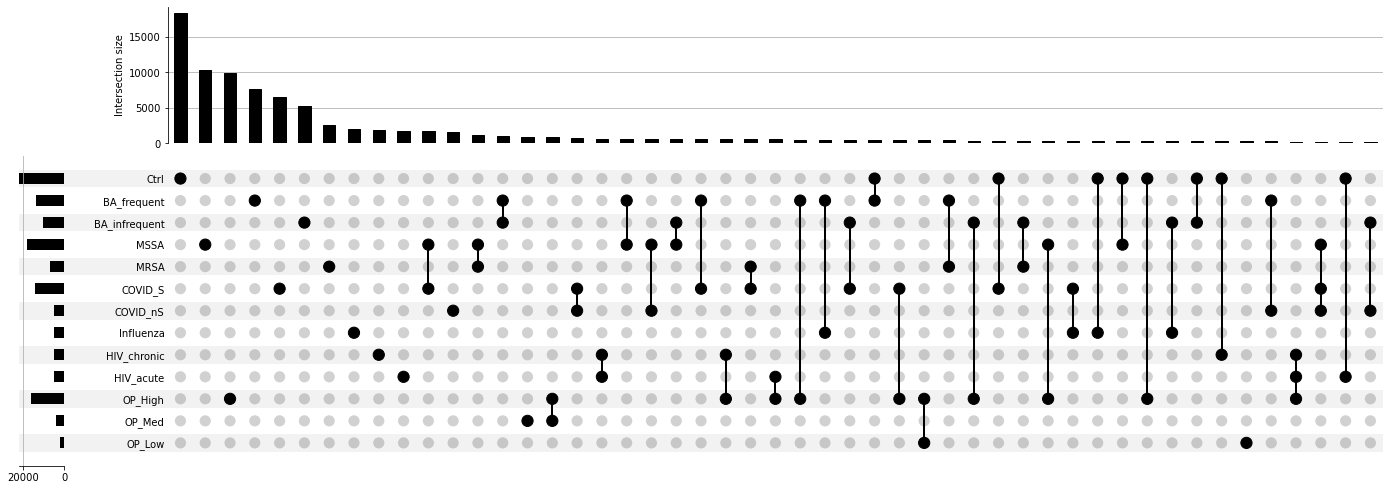

In [14]:
UpSet(hyper_input,min_subset_size=200, sort_by='cardinality', sort_categories_by='input').plot()
plt.savefig("hyper.upset.pdf")